# Load Dependencies

In [ ]:
import torch
import torch.nn as nn

from torchvision.datasets import MNIST
from torchvision import transforms

from torchsummary import summary
import matplotlib.pyplot as plt


In [ ]:
from torch.utils.data import DataLoader

# Load Data

In [ ]:
train = MNIST("data", train = True, transform=transforms.ToTensor(), download=True)
test = MNIST("data",train=False, transform=transforms.ToTensor())

Totensor() scales pixles from [0,255] to [0,1]

In [ ]:
train.data.shape

torch.Size([60000, 28, 28])

In [ ]:
train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

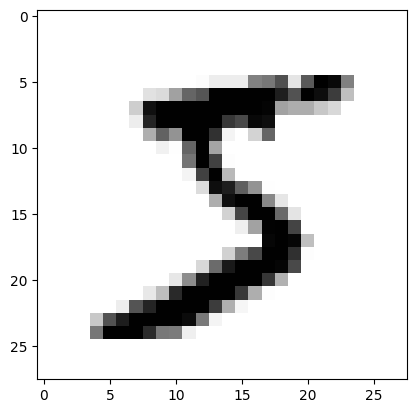

In [ ]:
plt.imshow(train.data[0].numpy().squeeze(),cmap="gray_r")

In [ ]:
train.targets[0:100]

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7,
        1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0,
        7, 8, 3, 1])

In [ ]:
train.targets.shape

torch.Size([60000])

In [ ]:
test.data.shape

torch.Size([10000, 28, 28])

In [ ]:
test.targets.shape

torch.Size([10000])

# Batch Data

In [ ]:
train_loader = torch.utils.data.DataLoader(train,batch_size=128,shuffle=True)
test_loader = torch.utils.data.DataLoader(test,batch_size=128)

DataLoader() can also sample and run multithread over a set number of workers

In [ ]:
x_sample, y_sample = next(iter(train_loader))


In [ ]:
x_sample.shape

torch.Size([128, 1, 28, 28])

In [ ]:
y_sample.shape

torch.Size([128])

In [ ]:
y_sample

tensor([0, 8, 9, 8, 9, 6, 5, 5, 3, 9, 1, 0, 7, 0, 0, 0, 3, 9, 2, 4, 8, 0, 9, 9,
        2, 3, 7, 2, 7, 3, 5, 0, 3, 2, 4, 9, 7, 1, 4, 3, 3, 0, 1, 5, 3, 4, 7, 1,
        8, 6, 7, 9, 2, 7, 2, 1, 1, 7, 9, 6, 1, 9, 4, 8, 4, 7, 8, 9, 2, 9, 8, 4,
        2, 0, 3, 8, 0, 5, 0, 9, 4, 5, 9, 2, 5, 4, 2, 9, 0, 4, 2, 7, 6, 2, 2, 0,
        8, 2, 8, 2, 6, 2, 7, 7, 6, 9, 3, 6, 9, 1, 6, 7, 3, 7, 9, 1, 2, 8, 5, 7,
        1, 4, 3, 6, 9, 1, 3, 1])

In [ ]:
x_sample[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
x_flat_sample=x_sample.view(x_sample.shape[0],-1)

view() reshapes the tensor

In [ ]:
x_flat_sample.shape

torch.Size([128, 784])

In [ ]:
x_flat_sample[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

# Design Neural Network Architecture

In [ ]:
n_input = 784
n_dense = 64
n_out = 10

In [ ]:
model = nn.Sequential(
    nn.Linear(n_input,n_dense), # hidden layer
    nn.Sigmoid(), # activation function
    nn.Linear(n_dense,n_out) # output layer
)

In [ ]:
summary(model,(1,n_input))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 64]          50,240
           Sigmoid-2                [-1, 1, 64]               0
            Linear-3                [-1, 1, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.19
Estimated Total Size (MB): 0.20
----------------------------------------------------------------


# Configure training hyperparameters

In [ ]:
cost_fxn = nn.crossEntropyLoss() # include softmax activation

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train

In [ ]:
def accuracy_pct(pred_y, true_y):
  _,prediction = torch.max(pred_y,1) # returns maximum values, indices; fed tensor, dim to
  correct = (prediction == true_y).sum().item()
  return(correct/true_y.shape[0])*100.0

In [ ]:
n_batches = len(train_loader)
n_batches

469

In [ ]:
n_epochs = 20
print("Training for {} epochs. \n".format(n_epochs))
for epoch in range(n_epochs):
  avg_cost = 0.0
  avg_accuracy = 0.0

  for i, (x,y) in enumerate(train_loader): # enumerate() provides the count of iterations

    # forward propogation:

    # backprop and optimization via gradient descent:

    # Calculate accuracy metric:
    accuracy = accuracy_pct(y_hat,y)
    avg_accuracy += accuracy / n_batches

    if(i+1) % 100 == 0:
      print("Step {}".format(i+1))